<a href="https://colab.research.google.com/github/Anuk17/capstone/blob/main/grid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

# Upload the file
uploaded = files.upload()
csv_file = list(uploaded.keys())[0]
df = pd.read_csv(csv_file)

Saving peak_hours.csv to peak_hours.csv


In [ ]:

'''# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id]

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    return ride_counts_10min, rides_to_doloc, same_location_rides

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
ride_counts_10min, rides_to_doloc, same_location_rides = get_ride_statistics(pulocation_id, df)

print("Number of rides in 10-minute intervals:")
print(ride_counts_10min)

print("\nNumber of rides from PULocationID to different DOLocationIDs:")
print(rides_to_doloc)

print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

# Plot the 10-minute interval ride counts
plt.figure(figsize=(12, 6))
ride_counts_10min.plot(kind='bar')
plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()'''


'# Convert the datetime columns to datetime objects\ndf[\'tpep_pickup_datetime\'] = pd.to_datetime(df[\'tpep_pickup_datetime\'])\ndf[\'tpep_dropoff_datetime\'] = pd.to_datetime(df[\'tpep_dropoff_datetime\'])\n\ndef get_ride_statistics(pulocation_id, df):\n    # Filter data for the given PULocationID\n    filtered_data = df[df[\'PULocationID\'] == pulocation_id]\n\n    # Group by 10-minute intervals\n    filtered_data.set_index(\'tpep_pickup_datetime\', inplace=True)\n    ride_counts_10min = filtered_data.resample(\'10T\').size()\n\n    # Get the number of rides to each DOLocationID\n    rides_to_doloc = filtered_data[\'DOLocationID\'].value_counts()\n\n    # Get the number of rides within the same PULocationID\n    same_location_rides = filtered_data[filtered_data[\'PULocationID\'] == filtered_data[\'DOLocationID\']].shape[0]\n\n    return ride_counts_10min, rides_to_doloc, same_location_rides\n\n# Example usage\npulocation_id = 132  # Replace with any PULocationID you want to analyze\

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
# Specify the file path of the CSV file
file_path = '".csv"'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path)

FileNotFoundError: [Errno 2] No such file or directory: '".csv"'

Number of rides in 10-minute intervals:
tpep_pickup_datetime
2024-01-01 00:00:00    27
2024-01-01 00:10:00    19
2024-01-01 00:20:00    17
2024-01-01 00:30:00    35
2024-01-01 00:40:00    31
2024-01-01 00:50:00    20
2024-01-01 01:00:00    18
2024-01-01 01:10:00    18
2024-01-01 01:20:00     9
2024-01-01 01:30:00    18
2024-01-01 01:40:00     3
2024-01-01 01:50:00     0
2024-01-01 02:00:00     3
2024-01-01 02:10:00     3
2024-01-01 02:20:00     6
2024-01-01 02:30:00     1
2024-01-01 02:40:00     2
2024-01-01 02:50:00     6
Freq: 10T, dtype: int64

Number of rides from PULocationID to different DOLocationIDs:
DOLocationID
265.0    14
132.0    12
181.0     9
216.0     6
61.0      6
         ..
139.0     1
25.0      1
52.0      1
238.0     1
232.0     1
Name: count, Length: 114, dtype: int64

Number of rides within the same PULocationID (132): 12

Customer requests details:
     PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
0           132.0         216.0  2024-

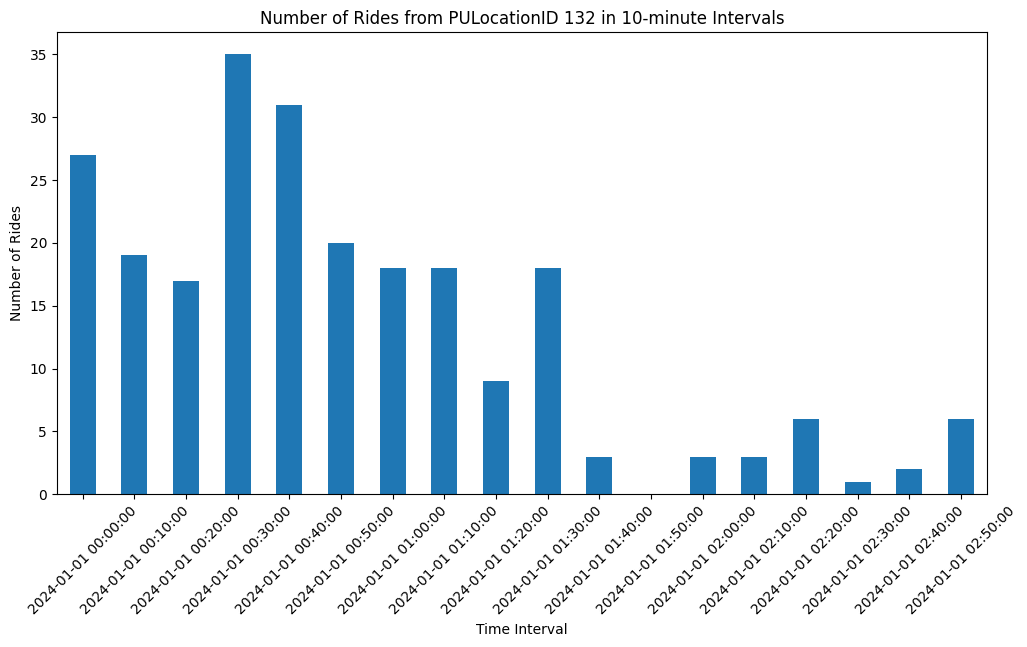

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id]

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Reset the index to access columns
    filtered_data.reset_index(inplace=True)

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    # Get customer requests data
    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = pulocation_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    return ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)

print("Number of rides in 10-minute intervals:")
print(ride_counts_10min)

print("\nNumber of rides from PULocationID to different DOLocationIDs:")
print(rides_to_doloc)

print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

print("\nCustomer requests details:")
print(customer_requests)

# Plot the 10-minute interval ride counts
plt.figure(figsize=(12, 6))
ride_counts_10min.plot(kind='bar')
plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()



Number of rides in 10-minute intervals:
tpep_pickup_datetime
2024-01-01 00:00:00    27
2024-01-01 00:10:00    19
2024-01-01 00:20:00    17
2024-01-01 00:30:00    35
2024-01-01 00:40:00    31
2024-01-01 00:50:00    20
2024-01-01 01:00:00    18
2024-01-01 01:10:00    18
2024-01-01 01:20:00     9
2024-01-01 01:30:00    18
2024-01-01 01:40:00     3
2024-01-01 01:50:00     0
2024-01-01 02:00:00     3
2024-01-01 02:10:00     3
2024-01-01 02:20:00     6
2024-01-01 02:30:00     1
2024-01-01 02:40:00     2
2024-01-01 02:50:00     6
Freq: 10T, dtype: int64

Number of rides from PULocationID to different DOLocationIDs:
DOLocationID
265.0    14
132.0    12
181.0     9
216.0     6
61.0      6
         ..
139.0     1
25.0      1
52.0      1
238.0     1
232.0     1
Name: count, Length: 114, dtype: int64

Number of rides within the same PULocationID (132): 12

Customer requests details:
     PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
0           132.0         216.0  2024-

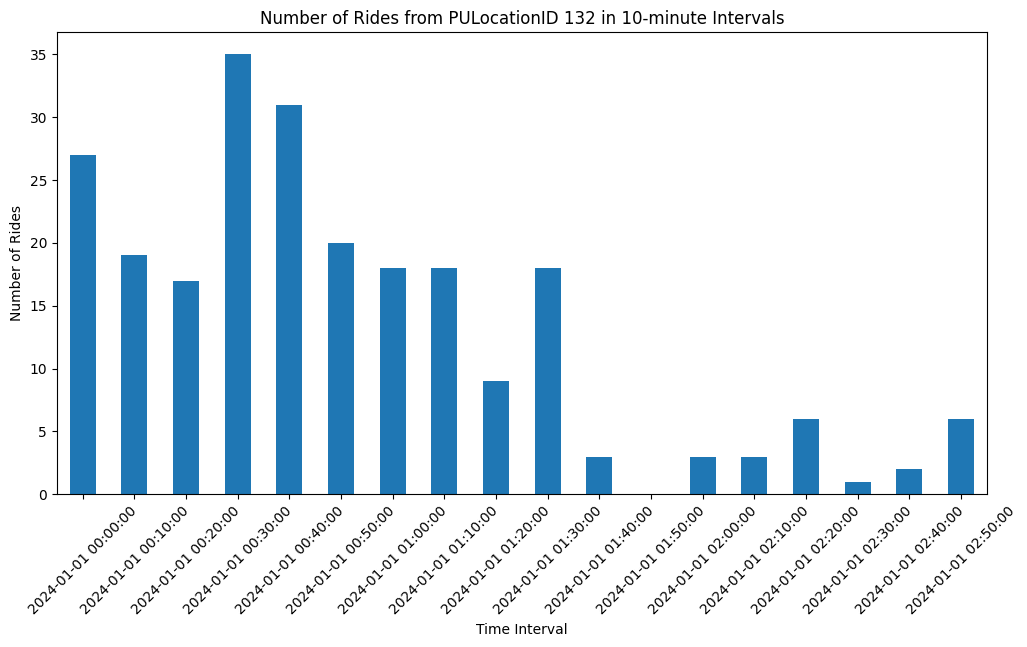

Details for slot ID 1:
    tpep_pickup_datetime  VendorID tpep_dropoff_datetime  passenger_count  \
17   2024-01-01 00:00:00       1.0   2024-01-01 00:28:00              3.0   
23   2024-01-01 00:00:00       2.0   2024-01-01 00:26:00              2.0   
43   2024-01-01 00:00:00       2.0   2024-01-01 00:29:00              1.0   
56   2024-01-01 00:00:00       2.0   2024-01-01 00:12:00              1.0   
127  2024-01-01 00:00:00       2.0   2024-01-01 00:24:00              3.0   
100  2024-01-01 00:01:00       2.0   2024-01-01 00:35:00              2.0   
41   2024-01-01 00:02:00       2.0   2024-01-01 00:27:00              2.0   
52   2024-01-01 00:02:00       2.0   2024-01-01 00:07:00              1.0   
31   2024-01-01 00:03:00       1.0   2024-01-01 00:36:00              1.0   
51   2024-01-01 00:03:00       2.0   2024-01-01 00:36:00              2.0   
59   2024-01-01 00:03:00       1.0   2024-01-01 00:20:00              0.0   
33   2024-01-01 00:04:00       2.0   2024-01-01 00:25

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id]

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Reset the index to access columns
    filtered_data.reset_index(inplace=True)

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    # Get customer requests data
    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = pulocation_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    # Create slot mapping for each 10-minute interval
    slot_mapping = {i+1: group for i, (index, group) in enumerate(filtered_data.groupby(pd.Grouper(key='tpep_pickup_datetime', freq='10T')))}

    return ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests, slot_mapping

def print_slot_details(slot_id, slot_mapping):
    if slot_id in slot_mapping:
        print(f"Details for slot ID {slot_id}:")
        print(slot_mapping[slot_id])
    else:
        print(f"Slot ID {slot_id} not found")

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests, slot_mapping = get_ride_statistics(pulocation_id, df)

print("Number of rides in 10-minute intervals:")
print(ride_counts_10min)

print("\nNumber of rides from PULocationID to different DOLocationIDs:")
print(rides_to_doloc)

print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

print("\nCustomer requests details:")
print(customer_requests)

# Plot the 10-minute interval ride counts
plt.figure(figsize=(12, 6))
ride_counts_10min.plot(kind='bar')
plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
plt.xlabel('Time Interval')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

# Print details for a specific slot ID
slot_id = 1  # Replace with the desired slot ID
print_slot_details(slot_id, slot_mapping)


Number of rides in 10-minute intervals with slot numbers:
         Time Interval  Number of Rides  Slot Number
0  2024-01-01 00:00:00               27            1
1  2024-01-01 00:10:00               19            2
2  2024-01-01 00:20:00               17            3
3  2024-01-01 00:30:00               35            4
4  2024-01-01 00:40:00               31            5
5  2024-01-01 00:50:00               20            6
6  2024-01-01 01:00:00               18            7
7  2024-01-01 01:10:00               18            8
8  2024-01-01 01:20:00                9            9
9  2024-01-01 01:30:00               18           10
10 2024-01-01 01:40:00                3           11
11 2024-01-01 01:50:00                0           12
12 2024-01-01 02:00:00                3           13
13 2024-01-01 02:10:00                3           14
14 2024-01-01 02:20:00                6           15
15 2024-01-01 02:30:00                1           16
16 2024-01-01 02:40:00                2  

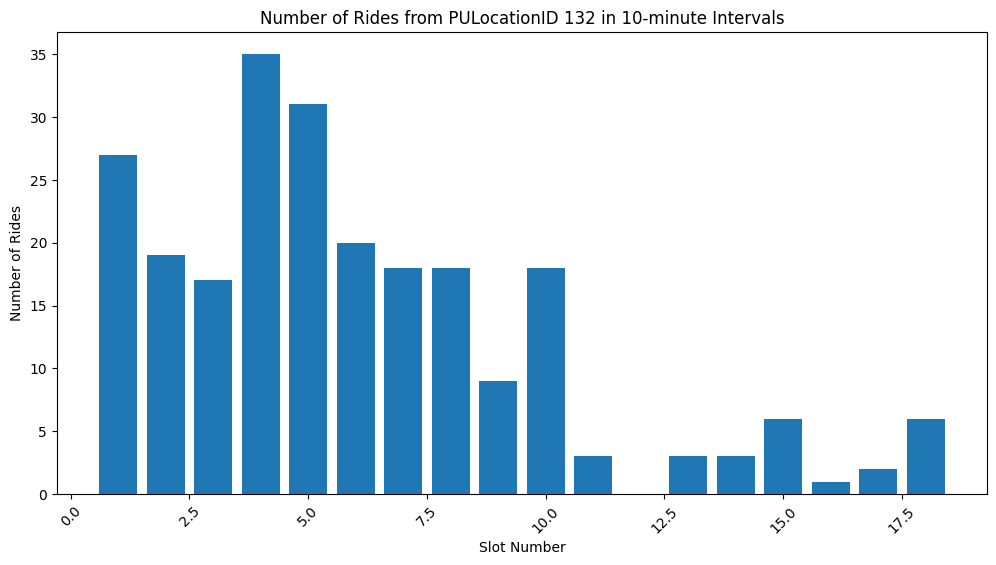

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id].copy()

    # Drop rows with missing datetime values
    filtered_data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Reset the index to access columns
    filtered_data.reset_index(inplace=True)

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    # Get customer requests data
    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = pulocation_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    # Add time slot information
    ride_counts_10min = ride_counts_10min.reset_index()
    ride_counts_10min.columns = ['Time Interval', 'Number of Rides']
    ride_counts_10min['Slot Number'] = range(1, len(ride_counts_10min) + 1)

    return ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)

print("Number of rides in 10-minute intervals with slot numbers:")
print(ride_counts_10min)

print("\nNumber of rides from PULocationID to different DOLocationIDs:")
print(rides_to_doloc)

print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

print("\nCustomer requests details:")
print(customer_requests)

# Plot the 10-minute interval ride counts
plt.figure(figsize=(12, 6))
plt.bar(ride_counts_10min['Slot Number'], ride_counts_10min['Number of Rides'])
plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
plt.xlabel('Slot Number')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

Number of rides in 10-minute intervals with slot numbers:
         Time Interval  Number of Rides  Slot Number
0  2024-01-01 00:00:00               27            1
1  2024-01-01 00:10:00               19            2
2  2024-01-01 00:20:00               17            3
3  2024-01-01 00:30:00               35            4
4  2024-01-01 00:40:00               31            5
5  2024-01-01 00:50:00               20            6
6  2024-01-01 01:00:00               18            7
7  2024-01-01 01:10:00               18            8
8  2024-01-01 01:20:00                9            9
9  2024-01-01 01:30:00               18           10
10 2024-01-01 01:40:00                3           11
11 2024-01-01 01:50:00                0           12
12 2024-01-01 02:00:00                3           13
13 2024-01-01 02:10:00                3           14
14 2024-01-01 02:20:00                6           15
15 2024-01-01 02:30:00                1           16
16 2024-01-01 02:40:00                2  

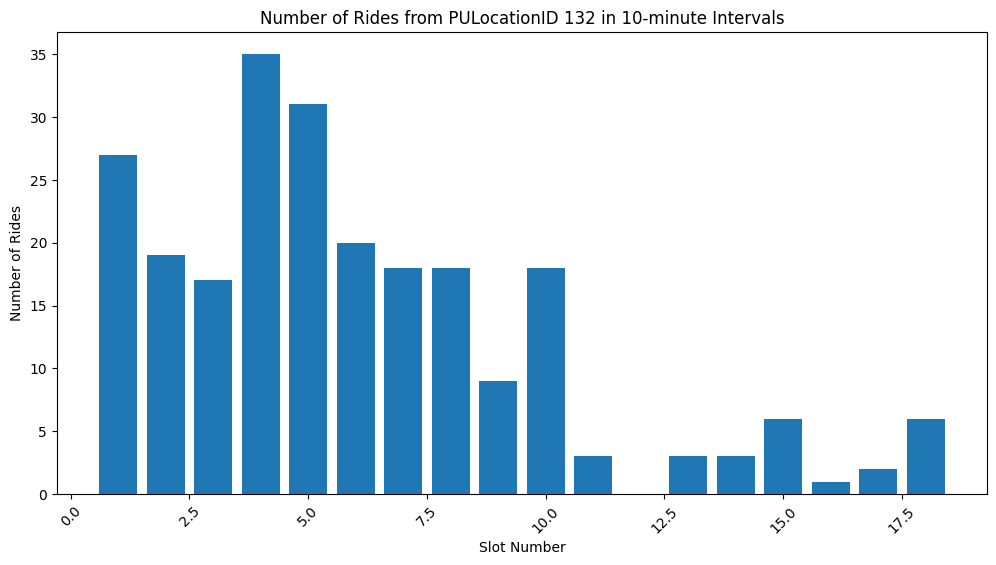

Details for slot ID 1:
     PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
3           132.0         170.0  2024-01-01 00:06:00   2024-01-01 00:31:00   
6           132.0          35.0  2024-01-01 00:07:00   2024-01-01 00:35:00   
17          132.0         129.0  2024-01-01 00:00:00   2024-01-01 00:28:00   
18          132.0          76.0  2024-01-01 00:07:00   2024-01-01 00:27:00   
23          132.0          41.0  2024-01-01 00:00:00   2024-01-01 00:26:00   
31          132.0         181.0  2024-01-01 00:03:00   2024-01-01 00:36:00   
32          132.0           7.0  2024-01-01 00:07:00   2024-01-01 00:28:00   
33          132.0         216.0  2024-01-01 00:04:00   2024-01-01 00:25:00   
41          132.0         263.0  2024-01-01 00:02:00   2024-01-01 00:27:00   
43          132.0         145.0  2024-01-01 00:00:00   2024-01-01 00:29:00   
44          132.0          24.0  2024-01-01 00:08:00   2024-01-01 00:44:00   
51          132.0          41.0  2024-01-

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id].copy()

    # Drop rows with missing datetime values
    filtered_data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Reset the index to access columns
    filtered_data.reset_index(inplace=True)

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    # Get customer requests data
    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = pulocation_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    # Add time slot information
    ride_counts_10min = ride_counts_10min.reset_index()
    ride_counts_10min.columns = ['Time Interval', 'Number of Rides']
    ride_counts_10min['Slot Number'] = range(1, len(ride_counts_10min) + 1)

    # Define the bins for pd.cut
    bins = pd.date_range(start=ride_counts_10min['Time Interval'].min(),
                         end=ride_counts_10min['Time Interval'].max() + pd.Timedelta(minutes=10),
                         freq='10T')

    # Map Slot Number to customer requests
    customer_requests['Slot Number'] = pd.cut(customer_requests['tpep_pickup_datetime'],
                                              bins=bins,
                                              labels=range(1, len(bins)),
                                              right=False)

    return ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests

def print_slot_details(slot_id, customer_requests):
    slot_details = customer_requests[customer_requests['Slot Number'] == slot_id]
    if not slot_details.empty:
        print(f"Details for slot ID {slot_id}:")
        print(slot_details)
    else:
        print(f"No data found for Slot ID {slot_id}")

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)

print("Number of rides in 10-minute intervals with slot numbers:")
print(ride_counts_10min)

print("\nNumber of rides from PULocationID to different DOLocationIDs:")
print(rides_to_doloc)

print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

print("\nCustomer requests details:")
print(customer_requests)

# Plot the 10-minute interval ride counts
plt.figure(figsize=(12, 6))
plt.bar(ride_counts_10min['Slot Number'], ride_counts_10min['Number of Rides'])
plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
plt.xlabel('Slot Number')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.show()

# Get details for a specific slot ID
slot_id = 1  # Replace with the desired slot ID
print_slot_details(slot_id, customer_requests)


Number of rides in 10-minute intervals with slot numbers:
         Time Interval  Number of Rides  Slot Number
0  2024-01-01 00:00:00               27            1
1  2024-01-01 00:10:00               19            2
2  2024-01-01 00:20:00               17            3
3  2024-01-01 00:30:00               35            4
4  2024-01-01 00:40:00               31            5
5  2024-01-01 00:50:00               20            6
6  2024-01-01 01:00:00               18            7
7  2024-01-01 01:10:00               18            8
8  2024-01-01 01:20:00                9            9
9  2024-01-01 01:30:00               18           10
10 2024-01-01 01:40:00                3           11
11 2024-01-01 01:50:00                0           12
12 2024-01-01 02:00:00                3           13
13 2024-01-01 02:10:00                3           14
14 2024-01-01 02:20:00                6           15
15 2024-01-01 02:30:00                1           16
16 2024-01-01 02:40:00                2  

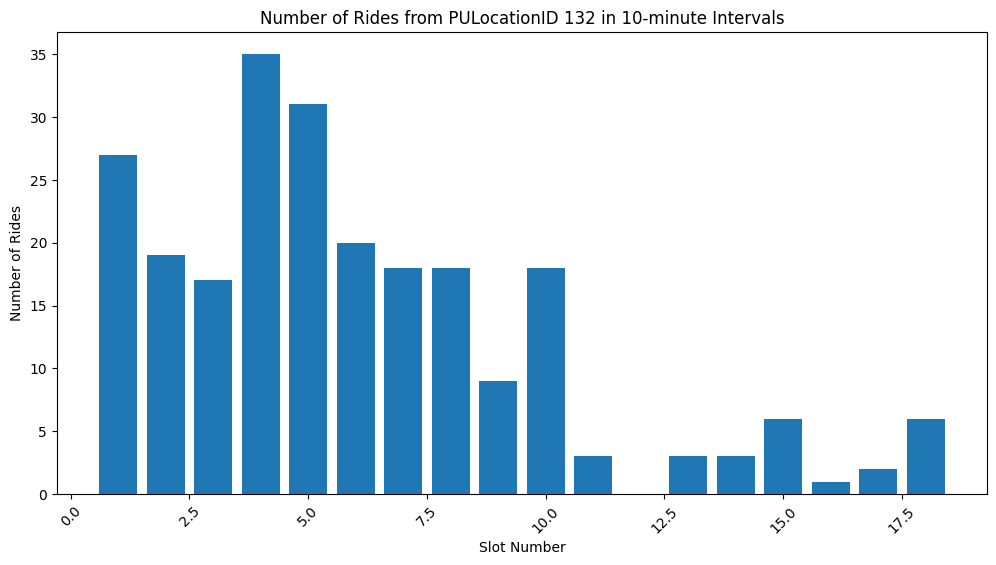

Details for slot ID 1:
     PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
3           132.0         170.0  2024-01-01 00:06:00   2024-01-01 00:31:00   
6           132.0          35.0  2024-01-01 00:07:00   2024-01-01 00:35:00   
17          132.0         129.0  2024-01-01 00:00:00   2024-01-01 00:28:00   
18          132.0          76.0  2024-01-01 00:07:00   2024-01-01 00:27:00   
23          132.0          41.0  2024-01-01 00:00:00   2024-01-01 00:26:00   
31          132.0         181.0  2024-01-01 00:03:00   2024-01-01 00:36:00   
32          132.0           7.0  2024-01-01 00:07:00   2024-01-01 00:28:00   
33          132.0         216.0  2024-01-01 00:04:00   2024-01-01 00:25:00   
41          132.0         263.0  2024-01-01 00:02:00   2024-01-01 00:27:00   
43          132.0         145.0  2024-01-01 00:00:00   2024-01-01 00:29:00   
44          132.0          24.0  2024-01-01 00:08:00   2024-01-01 00:44:00   
51          132.0          41.0  2024-01-

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id].copy()

    # Drop rows with missing datetime values
    filtered_data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

    if filtered_data.empty:
        print(f"No data found for PULocationID {pulocation_id}")
        return None, None, None, None

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Reset the index to access columns
    filtered_data.reset_index(inplace=True)

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    # Get customer requests data
    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = pulocation_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    # Add time slot information
    ride_counts_10min = ride_counts_10min.reset_index()
    ride_counts_10min.columns = ['Time Interval', 'Number of Rides']
    ride_counts_10min['Slot Number'] = range(1, len(ride_counts_10min) + 1)

    # Map Slot Number to customer requests
    customer_requests['Slot Number'] = pd.cut(customer_requests['tpep_pickup_datetime'],
                                              bins=pd.date_range(start=ride_counts_10min['Time Interval'].min(),
                                                                 end=ride_counts_10min['Time Interval'].max() + pd.Timedelta(minutes=10),
                                                                 freq='10T'),
                                              labels=range(1, len(ride_counts_10min) + 1),
                                              right=False)

    return ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests

def print_slot_details(slot_id, customer_requests):
    slot_details = customer_requests[customer_requests['Slot Number'] == slot_id]
    if not slot_details.empty:
        print(f"Details for slot ID {slot_id}:")
        print(slot_details)
    else:
        print(f"No data found for Slot ID {slot_id}")

def get_all_slot_details(slot_id, df):
    pulocation_ids = df['PULocationID'].unique()
    all_details = []

    for pulocation_id in pulocation_ids:
        ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)
        if ride_counts_10min is not None:
            slot_details = customer_requests[customer_requests['Slot Number'] == slot_id]
            if not slot_details.empty:
                all_details.append(slot_details)

    if all_details:
        all_details_df = pd.concat(all_details)
        print(f"Details for all grids for slot ID {slot_id}:")
        print(all_details_df)
    else:
        print(f"No data found for Slot ID {slot_id} across all grids")

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)

if ride_counts_10min is not None:
    print("Number of rides in 10-minute intervals with slot numbers:")
    print(ride_counts_10min)

    print("\nNumber of rides from PULocationID to different DOLocationIDs:")
    print(rides_to_doloc)

    print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

    print("\nCustomer requests details:")
    print(customer_requests)

    # Plot the 10-minute interval ride counts
    plt.figure(figsize=(12, 6))
    plt.bar(ride_counts_10min['Slot Number'], ride_counts_10min['Number of Rides'])
    plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
    plt.xlabel('Slot Number')
    plt.ylabel('Number of Rides')
    plt.xticks(rotation=45)
    plt.show()

    # Get details for a specific slot ID
    slot_id = 1  # Replace with the desired slot ID
    print_slot_details(slot_id, customer_requests)

    # Get details for all grids for a specific slot ID
    get_all_slot_details(slot_id, df)
else:
    print(f"No data found for PULocationID {pulocation_id}")


Number of rides in 10-minute intervals with slot numbers:
         Time Interval  Number of Rides  Slot Number
0  2024-01-01 00:00:00               27            1
1  2024-01-01 00:10:00               19            2
2  2024-01-01 00:20:00               17            3
3  2024-01-01 00:30:00               35            4
4  2024-01-01 00:40:00               31            5
5  2024-01-01 00:50:00               20            6
6  2024-01-01 01:00:00               18            7
7  2024-01-01 01:10:00               18            8
8  2024-01-01 01:20:00                9            9
9  2024-01-01 01:30:00               18           10
10 2024-01-01 01:40:00                3           11
11 2024-01-01 01:50:00                0           12
12 2024-01-01 02:00:00                3           13
13 2024-01-01 02:10:00                3           14
14 2024-01-01 02:20:00                6           15
15 2024-01-01 02:30:00                1           16
16 2024-01-01 02:40:00                2  

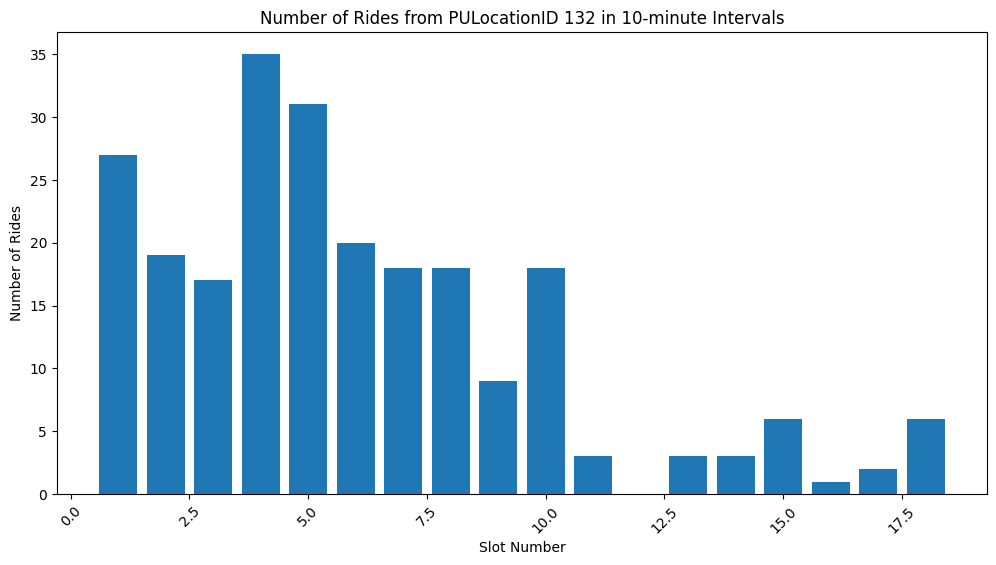

Details for PULocationID 132 and Slot ID 1:
     PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
3           132.0         170.0  2024-01-01 00:06:00   2024-01-01 00:31:00   
6           132.0          35.0  2024-01-01 00:07:00   2024-01-01 00:35:00   
17          132.0         129.0  2024-01-01 00:00:00   2024-01-01 00:28:00   
18          132.0          76.0  2024-01-01 00:07:00   2024-01-01 00:27:00   
23          132.0          41.0  2024-01-01 00:00:00   2024-01-01 00:26:00   
31          132.0         181.0  2024-01-01 00:03:00   2024-01-01 00:36:00   
32          132.0           7.0  2024-01-01 00:07:00   2024-01-01 00:28:00   
33          132.0         216.0  2024-01-01 00:04:00   2024-01-01 00:25:00   
41          132.0         263.0  2024-01-01 00:02:00   2024-01-01 00:27:00   
43          132.0         145.0  2024-01-01 00:00:00   2024-01-01 00:29:00   
44          132.0          24.0  2024-01-01 00:08:00   2024-01-01 00:44:00   
51          132.0   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the datetime columns to datetime objects
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], errors='coerce')
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], errors='coerce')

def get_ride_statistics(pulocation_id, df):
    # Filter data for the given PULocationID
    filtered_data = df[df['PULocationID'] == pulocation_id].copy()

    # Drop rows with missing datetime values
    filtered_data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

    if filtered_data.empty:
        print(f"No data found for PULocationID {pulocation_id}")
        return None, None, None, None

    # Group by 10-minute intervals
    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    # Reset the index to access columns
    filtered_data.reset_index(inplace=True)

    # Get the number of rides to each DOLocationID
    rides_to_doloc = filtered_data['DOLocationID'].value_counts()

    # Get the number of rides within the same PULocationID
    same_location_rides = filtered_data[filtered_data['PULocationID'] == filtered_data['DOLocationID']].shape[0]

    # Get customer requests data
    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = pulocation_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    # Add time slot information
    ride_counts_10min = ride_counts_10min.reset_index()
    ride_counts_10min.columns = ['Time Interval', 'Number of Rides']
    ride_counts_10min['Slot Number'] = range(1, len(ride_counts_10min) + 1)

    # Map Slot Number to customer requests
    customer_requests['Slot Number'] = pd.cut(customer_requests['tpep_pickup_datetime'],
                                              bins=pd.date_range(start=ride_counts_10min['Time Interval'].min(),
                                                                 end=ride_counts_10min['Time Interval'].max() + pd.Timedelta(minutes=10),
                                                                 freq='10T'),
                                              labels=range(1, len(ride_counts_10min) + 1),
                                              right=False)

    return ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests

def print_slot_details(slot_id, customer_requests):
    slot_details = customer_requests[customer_requests['Slot Number'] == slot_id]
    if not slot_details.empty:
        print(f"Details for slot ID {slot_id}:")
        print(slot_details)
    else:
        print(f"No data found for Slot ID {slot_id}")

def get_all_slot_details(pulocation_id, slot_id, df):
    ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)
    if ride_counts_10min is not None:
        slot_details = customer_requests[customer_requests['Slot Number'] == slot_id]
        if not slot_details.empty:
            print(f"Details for PULocationID {pulocation_id} and Slot ID {slot_id}:")
            print(slot_details)
        else:
            print(f"No data found for Slot ID {slot_id} at PULocationID {pulocation_id}")
    else:
        print(f"No data found for PULocationID {pulocation_id}")

# Example usage
pulocation_id = 132  # Replace with any PULocationID you want to analyze
slot_id = 1  # Replace with the desired slot ID
ride_counts_10min, rides_to_doloc, same_location_rides, customer_requests = get_ride_statistics(pulocation_id, df)

if ride_counts_10min is not None:
    print("Number of rides in 10-minute intervals with slot numbers:")
    print(ride_counts_10min)

    print("\nNumber of rides from PULocationID to different DOLocationIDs:")
    print(rides_to_doloc)

    print(f"\nNumber of rides within the same PULocationID ({pulocation_id}): {same_location_rides}")

    print("\nCustomer requests details:")
    print(customer_requests)

    # Plot the 10-minute interval ride counts
    plt.figure(figsize=(12, 6))
    plt.bar(ride_counts_10min['Slot Number'], ride_counts_10min['Number of Rides'])
    plt.title(f'Number of Rides from PULocationID {pulocation_id} in 10-minute Intervals')
    plt.xlabel('Slot Number')
    plt.ylabel('Number of Rides')
    plt.xticks(rotation=45)
    plt.show()

    # Get details for a specific slot ID and PULocationID
    get_all_slot_details(pulocation_id, slot_id, df)
else:
    print(f"No data found for PULocationID {pulocation_id}")

Number of rides in 10-minute intervals with slot numbers:
        Time Interval  Number of Rides  Slot Number
0 2024-01-01 00:50:00                1            1

Number of rides from the grid to different dropoff grids:
dropoff_grid_id
4    1
Name: count, dtype: int64

Number of rides within the same grid (1): 0

Customer requests details:
   PULocationID  DOLocationID tpep_pickup_datetime tpep_dropoff_datetime  \
0           186            79  2024-01-01 00:57:00   2024-01-01 01:17:00   

   current_location  maximum_waiting_time Slot Number  
0                 1                  20.0           1  


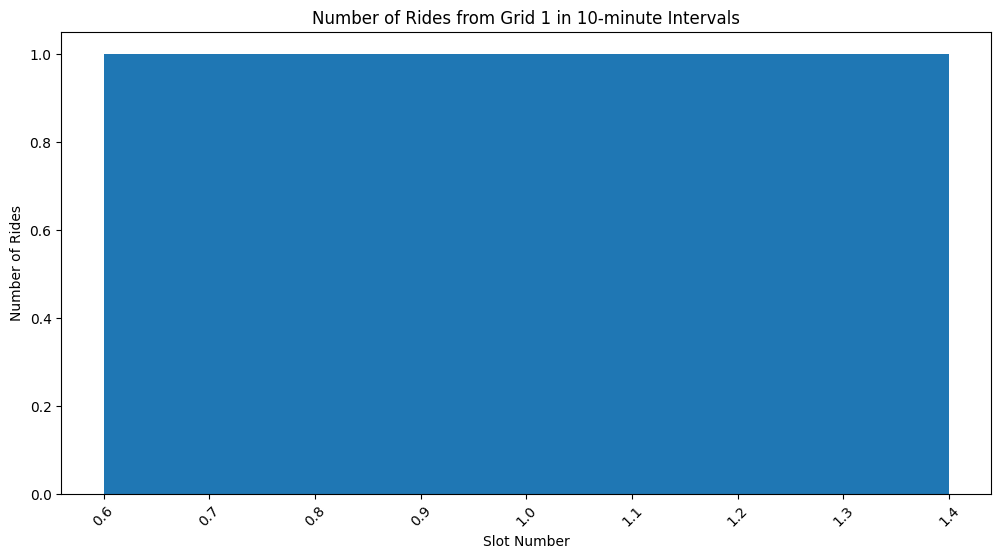

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data (replace with your actual DataFrame)
data = {
    'tpep_pickup_datetime': pd.to_datetime(['01-01-2024  00:57:00', '01-01-2024  00:03:00', '01-01-2024  00:17:00']),
    'tpep_dropoff_datetime': pd.to_datetime(['01-01-2024  01:17:00', '01-01-2024  00:09:00', '01-01-2024  00:35:00']),
    'PULocationID': [186, 140, 236],
    'DOLocationID': [79, 236, 79]
}

df = pd.DataFrame(data)

# Function to assign grid numbers based on PULocationID
def assign_grid_id(location_id):
    # Define your grid assignment logic here
    # For demonstration purposes, we're mapping location IDs to arbitrary grid numbers
    location_to_grid = {
        186: 1,
        140: 2,
        236: 3,
        79: 4
    }
    return location_to_grid.get(location_id, -1)  # Return -1 if location ID is not found

# Assign grid numbers to the DataFrame
df['pickup_grid_id'] = df['PULocationID'].apply(assign_grid_id)
df['dropoff_grid_id'] = df['DOLocationID'].apply(assign_grid_id)

# Define the function to get ride statistics for a specific grid
def get_ride_statistics_for_grid(grid_id, df):
    filtered_data = df[df['pickup_grid_id'] == grid_id].copy()

    filtered_data.dropna(subset=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

    if filtered_data.empty:
        print(f"No data found for Grid ID {grid_id}")
        return None, None, None, None

    filtered_data.set_index('tpep_pickup_datetime', inplace=True)
    ride_counts_10min = filtered_data.resample('10T').size()

    filtered_data.reset_index(inplace=True)

    rides_to_doloc = filtered_data['dropoff_grid_id'].value_counts()

    same_grid_rides = filtered_data[filtered_data['pickup_grid_id'] == filtered_data['dropoff_grid_id']].shape[0]

    customer_requests = filtered_data[['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].copy()
    customer_requests['current_location'] = grid_id
    customer_requests['maximum_waiting_time'] = (customer_requests['tpep_dropoff_datetime'] - customer_requests['tpep_pickup_datetime']).dt.total_seconds() / 60.0

    ride_counts_10min = ride_counts_10min.reset_index()
    ride_counts_10min.columns = ['Time Interval', 'Number of Rides']
    ride_counts_10min['Slot Number'] = range(1, len(ride_counts_10min) + 1)

    customer_requests['Slot Number'] = pd.cut(customer_requests['tpep_pickup_datetime'],
                                              bins=pd.date_range(start=ride_counts_10min['Time Interval'].min(),
                                                                 end=ride_counts_10min['Time Interval'].max() + pd.Timedelta(minutes=10),
                                                                 freq='10T'),
                                              labels=range(1, len(ride_counts_10min) + 1),
                                              right=False)

    return ride_counts_10min, rides_to_doloc, same_grid_rides, customer_requests

# Example usage
grid_id = 1  # Replace with the grid ID you want to analyze
ride_counts_10min, rides_to_doloc, same_grid_rides, customer_requests = get_ride_statistics_for_grid(grid_id, df)

if ride_counts_10min is not None:
    print("Number of rides in 10-minute intervals with slot numbers:")
    print(ride_counts_10min)

    print("\nNumber of rides from the grid to different dropoff grids:")
    print(rides_to_doloc)

    print(f"\nNumber of rides within the same grid ({grid_id}): {same_grid_rides}")

    print("\nCustomer requests details:")
    print(customer_requests)

    # Plot the 10-minute interval ride counts
    plt.figure(figsize=(12, 6))
    plt.bar(ride_counts_10min['Slot Number'], ride_counts_10min['Number of Rides'])
    plt.title(f'Number of Rides from Grid {grid_id} in 10-minute Intervals')
    plt.xlabel('Slot Number')
    plt.ylabel('Number of Rides')
    plt.xticks(rotation=45)
    plt.show()
else:
    print(f"No data found for Grid ID {grid_id}")
